# Gas Station Relocation Analysis in Boston, MA

## Installations

In [70]:
!pip install pysal openpyxl geopandas pandas h3 geopy osmnx

### Data Preprocessing

We need the boston map. As we are going to analize schools and gas stations we must omit the water bodies. A good option is:


*   https://www.mass.gov/info-details/massgis-data-municipalities

You will select the shapefile for Boston from there. The file returned will be a zip, which I have saved on GitHub from where I read it:



In [71]:
import geopandas as gpd

#filez="https://github.com/DACSS-Spatial/data_forSpatial/raw/refs/heads/main/BOSTON/GISDATA.TOWNSSURVEY_POLYM.zip"
filez = "https://github.com/Spatial-Data-Analytics-DACSS-690D/Gas-Station-Relocation-Analysis/raw/refs/heads/main/Data/BOSTON/GISDATA.TOWNSSURVEY_POLYM.zip"
boston=gpd.read_file(filez)
boston.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   town        1 non-null      object  
 1   town_id     1 non-null      int32   
 2   type        1 non-null      object  
 3   county      1 non-null      object  
 4   fips_stco   1 non-null      int32   
 5   fourcolor   1 non-null      int32   
 6   pop1960     1 non-null      int32   
 7   pop1970     1 non-null      int32   
 8   pop1980     1 non-null      int32   
 9   pop1990     1 non-null      int32   
 10  pop2000     1 non-null      int32   
 11  pop2010     1 non-null      int32   
 12  pop2020     1 non-null      int32   
 13  popch10_20  1 non-null      int32   
 14  area_acres  1 non-null      float64 
 15  area_sqmi   1 non-null      float64 
 16  geometry    1 non-null      geometry
dtypes: float64(2), geometry(1), int32(11), object(3)
memory usage: 224.0+ bytes


In [72]:
boston

,town,town_id,type,county,fips_stco,fourcolor,pop1960,pop1970,pop1980,pop1990,pop2000,pop2010,pop2020,popch10_20,area_acres,area_sqmi,geometry
0,BOSTON,35,C,SUFFOLK,25025,1,697197,641071,562994,574283,588957,617594,675647,58053,32104.34973,50.15997,"MULTIPOLYGON (((235056.153 904531.255, 235060...."


In [73]:
boston.crs

<Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meter)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Crowdsourced data pre processing

Now we need the schools and gas stations.


In [74]:
# Get gas stations in Boston
import osmnx as ox

stations = ox.features_from_place("Boston, Massachusetts, USA",
                                tags={'amenity': 'fuel'})

In [75]:
stations.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 55 entries, ('node', np.int64(1547613299)) to ('way', np.int64(997511426))
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   geometry              55 non-null     geometry
 1   amenity               55 non-null     object  
 2   addr:city             21 non-null     object  
 3   addr:housenumber      26 non-null     object  
 4   addr:postcode         23 non-null     object  
 5   addr:state            20 non-null     object  
 6   addr:street           26 non-null     object  
 7   brand                 35 non-null     object  
 8   brand:wikidata        35 non-null     object  
 9   name                  45 non-null     object  
 10  opening_hours         7 non-null      object  
 11  compressed_air        9 non-null      object  
 12  source                4 non-null      object  
 13  ref                   7 non-null      object  
 1

OSM gave us stations unprojecte so lets project those.

In [76]:
stations.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [77]:
stations

geometry  \
element  id                                                               
node     1547613299                          POINT (-71.11921 42.27983)   
         1915267811                          POINT (-71.12623 42.35823)   
         1975943661                          POINT (-71.05651 42.32059)   
         2086266695                          POINT (-71.15482 42.29539)   
         2108017693                          POINT (-71.15664 42.26192)   
         2108018346                          POINT (-71.16118 42.25828)   
         2108019392                          POINT (-71.15166 42.28766)   
         2299726166                           POINT (-71.11332 42.3174)   
         4119910813                          POINT (-71.11833 42.29594)   
         4456008435                          POINT (-71.03919 42.37176)   
         4456091896                          POINT (-71.02777 42.37965)   
         4456091915                          POINT (-71.00924 42.38557)   
         5012538664                          POINT (-71.04636 42.28384)   
         7049179057                          POINT (-71.13113 42.28346)   
         7711828654                          POINT (-71.09536 42.34499)   
         7779156553                          POINT (-71.03967 42.38287)   
         7801604967                          POINT (-71.06318 42.37186)   
         8911740730                          POINT (-71.12258 42.24965)   
         9155798164                          POINT (-71.11235 42.33173)   
         9301640141                          POINT (-71.12988 42.35254)   
         9307561244                             POINT (-71.08 42.38247)   
         9826872460                          POINT (-71.13487 42.35426)   
         11512786470                         POINT (-71.11478 42.27676)   
         12636225024                         POINT (-71.15399 42.34196)   
         12850165667                         POINT (-71.14183 42.34454)   
         13205043192                          POINT (-71.07321 42.2714)   
         13205071184                          POINT (-71.1061 42.27145)   
         13227205788                         POINT (-71.06912 42.27873)   
relation 13500843     POLYGON ((-71.02803 42.36628, -71.02801 42.366...   
way      29520631     POLYGON ((-71.02751 42.37897, -71.02755 42.379...   
         29613466     POLYGON ((-71.0565 42.3211, -71.05662 42.32109...   
         29622378     POLYGON ((-71.05527 42.33449, -71.05539 42.334...   
         29648812     POLYGON ((-71.07091 42.33124, -71.07092 42.331...   
         29650844     POLYGON ((-71.08125 42.33912, -71.08128 42.339...   
         29677198     POLYGON ((-71.12761 42.23623, -71.1277 42.2362...   
         29778889     POLYGON ((-71.14953 42.35589, -71.1497 42.3559...   
         29779289     POLYGON ((-71.16721 42.35018, -71.16746 42.350...   
         29804770     POLYGON ((-71.05959 42.31409, -71.05971 42.314...   
         29805421     POLYGON ((-71.07033 42.33183, -71.07046 42.331...   
         29806343     POLYGON ((-71.09524 42.3456, -71.09529 42.3456...   
         29829809     POLYGON ((-71.11445 42.31527, -71.11447 42.315...   
         29831768     POLYGON ((-71.04201 42.28608, -71.04206 42.286...   
         29833313     POLYGON ((-71.04847 42.29561, -71.04855 42.295...   
         29887927     POLYGON ((-71.11912 42.27979, -71.11931 42.279...   
         29934128     POLYGON ((-71.1142 42.31577, -71.1143 42.3158,...   
         29934166     POLYGON ((-71.10606 42.30727, -71.10635 42.307...   
         29941823     POLYGON ((-71.10334 42.33343, -71.10368 42.333...   
         29946760     POLYGON ((-71.05551 42.34139, -71.05548 42.341...   
         212124454    POLYGON ((-71.06475 42.32535, -71.06441 42.325...   
         212129122    POLYGON ((-71.11089 42.32082, -71.11083 42.320...   
         350480325    POLYGON ((-71.13054 42.36304, -71.13037 42.363...   
         405514198    POLYGON ((-71.08174 42.34024, -71.08186 42.340...   
         6444

Here, we facing problem of multi-indexing. Lets fix it.

In [78]:
stations.index

MultiIndex([(    'node',  1547613299),
            (    'node',  1915267811),
            (    'node',  1975943661),
            (    'node',  2086266695),
            (    'node',  2108017693),
            (    'node',  2108018346),
            (    'node',  2108019392),
            (    'node',  2299726166),
            (    'node',  4119910813),
            (    'node',  4456008435),
            (    'node',  4456091896),
            (    'node',  4456091915),
            (    'node',  5012538664),
            (    'node',  7049179057),
            (    'node',  7711828654),
            (    'node',  7779156553),
            (    'node',  7801604967),
            (    'node',  8911740730),
            (    'node',  9155798164),
            (    'node',  9301640141),
            (    'node',  9307561244),
            (    'node',  9826872460),
            (    'node', 11512786470),
            (    'node', 12636225024),
            (    'node', 12850165667),
            (    'node', 

Some formatting is needed at this stage:

- This will put current indexes back into the data, and numbers will appear:

In [79]:
stations.reset_index(drop=False,inplace=True)
stations.head()

,element,id,geometry,amenity,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,brand,...,brand:website,building,fuel:diesel,fuel:gasoline,layer,opening_hours:signed,operator,building:levels,fuel:octane_95,type
0,node,1547613299,POINT (-71.11921 42.27983),fuel,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,1915267811,POINT (-71.12623 42.35823),fuel,Allston,219,02134,MA,Cambridge Street,Shell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,1975943661,POINT (-71.05651 42.32059),fuel,Dorchester,888,02125,MA,Dorchester Avenue,Gulf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,2086266695,POINT (-71.15482 42.29539),fuel,NaN,NaN,NaN,NaN,NaN,Shell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,2108017693,POINT (-71.15664 42.26192),fuel,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Keep some columns:

In [80]:
colsToKeep=['element','name','geometry']
fuelBoston=stations[colsToKeep].copy()

- Reproject the data:

In [81]:
Boston_crs = "EPSG:26986"

fuelBoston = fuelBoston.to_crs(Boston_crs)

- Review:

In [82]:
fuelBoston.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   element   55 non-null     object  
 1   name      45 non-null     object  
 2   geometry  55 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.4+ KB


- From above, columns **name** of the gas station has missing values. We should rename those missing values:

In [83]:
fuelBoston.fillna({'name':'Unknown'},inplace=True)

- We usually use the names as row index. But row index should not have duplicates. Since several 'names' are the same (_Unknown_), we have to create new names:

In [84]:
fuelBoston.index.astype(str)+"_"+fuelBoston.name

,0
0,0_Unknown
1,1_Shell
2,2_Columbia Road Gulf
3,3_Shell
4,4_Unknown
5,5_Speedway
6,6_Speedway
7,7_JP Oil
8,8_Emporium Gas
9,9_Shell


Then,

In [85]:
fuelBoston['newname']=fuelBoston.index.astype(str)+"_"+fuelBoston.name
fuelBoston.set_index('newname',inplace=True)
fuelBoston.drop(columns=['name'],inplace=True)
fuelBoston.head()

,element,geometry
newname,,
0_Unknown,node,POINT (231409.143 892220.926)
1_Shell,node,POINT (230791.481 900926.666)
2_Columbia Road Gulf,node,POINT (236556.789 896773.461)
3_Shell,node,POINT (228464.806 893936.818)
4_Unknown,node,POINT (228329.564 890218.832)


See that **nodes** are points, **ways** are lines or simple shapes built from points, and **relations** are conceptual containers that group any of the other elements to represent complex features.

Let me compare with the geometries available:


Let's get the schools:

In [86]:
# Get schools in Boston
schools = ox.features_from_place("Boston, Massachusetts, USA",
                                tags={'amenity': 'school'})
schools.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 271 entries, ('node', np.int64(257493925)) to ('way', np.int64(1417025273))
Data columns (total 99 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   geometry                 271 non-null    geometry
 1   addr:city                185 non-null    object  
 2   addr:housenumber         197 non-null    object  
 3   addr:postcode            188 non-null    object  
 4   addr:state               166 non-null    object  
 5   addr:street              198 non-null    object  
 6   amenity                  271 non-null    object  
 7   attribution              116 non-null    object  
 8   gnis:feature_id          127 non-null    object  
 9   jurisdiction             1 non-null      object  
 10  name                     264 non-null    object  
 11  old_name                 12 non-null     object  
 12  source_url               27 non-null     object  
 13  gra

Let's reformat this as we did before:

In [87]:
schools.reset_index(inplace=True)
schoolBoston=schools[['element','name','geometry']].copy()
schoolBoston.fillna({'name':'Unknown'},inplace=True)
schoolBoston['newname']=schoolBoston.index.astype(str)+"_"+schoolBoston.name
schoolBoston.set_index('newname',inplace=True)
schoolBoston.drop(columns=['name'],inplace=True)
schoolBoston = schoolBoston.to_crs(Boston_crs)
schoolBoston.head()


,element,geometry
newname,,
0_Boston Police Academy,node,POINT (231587.475 888708.279)
1_Urban Science Academy,node,POINT (226876.248 892442.873)
2_Boston Middle School Academy,node,POINT (234181.835 894623.35)
3_Ralph Waldo Emerson School,node,POINT (235209.733 897088.577)
4_John Paul II Polish School,node,POINT (236451.631 897587.401)


See element vs geo:

In [88]:
base=boston.explore(tiles='cartodbpositron',color='lightblue')
schoolBoston.explore(m=base,color='k')
fuelBoston.explore(m=base,color='red')

# Explore proximity:


Let's compute a couple of distance matrices.

- The distance among fuel stations

In [89]:
D_Matrix_fuel_fuel=fuelBoston.geometry.apply\
(lambda station: fuelBoston.geometry.distance(station))

D_Matrix_fuel_fuel

newname,0_Unknown,1_Shell,2_Columbia Road Gulf,3_Shell,4_Unknown,5_Speedway,6_Speedway,7_JP Oil,8_Emporium Gas,9_Shell,...,45_Stan Hatoff's,46_Unknown,47_Southie Gas,48_Stop & Shop Gas,49_Unknown,50_Nouria,51_Shell,52_Speedway,53_Roger's Services,54_Unknown
newname,,,,,,,,,,,,,,,,,,,,,
0_Unknown,0.000000,8727.623151,6871.960087,3407.843812,3673.170656,4209.717878,2813.970059,4201.364992,1790.404226,12155.746314,...,3234.496026,6095.242127,8620.626164,6760.390125,4602.264075,9268.656180,7386.487048,5883.146257,4859.737118,3884.463385
1_Shell,8727.623151,0.000000,7105.483240,7366.912009,10987.207581,11470.088025,8114.563588,4658.243410,6950.073623,7326.086240,...,5867.405786,3305.374660,6111.395671,6245.492972,4335.437515,616.085751,4161.177357,10476.808240,13464.001150,7763.763922
2_Columbia Road Gulf,6871.960087,7105.483240,0.000000,8574.773029,10519.048580,11064.410899,8655.957769,4696.402144,5785.574411,5859.695272,...,4331.606724,4113.498253,2305.082258,842.481759,4470.898884,7684.998277,3013.291896,4137.189016,11158.587526,9232.822726
3_Shell,3407.843812,7366.912009,8574.773029,0.000000,3720.444167,4155.567868,898.003048,4205.040310,3009.859893,12758.001444,...,4214.103419,5977.665658,9649.687217,8137.414204,4593.188842,7756.623582,7816.720550,8895.344764,6749.619998,658.509280
4_Unknown,3673.170656,10987.207581,10519.048580,3720.444167,0.000000,551.674869,2887.510356,7122.880190,4925.468230,15575.082866,...,6537.964899,9075.112559,12142.369844,10345.874845,7552.209645,11415.890128,10668.035773,9280.142451,3438.441559,3554.261945
5_Speedway,4209.717878,11470.088025,11064.410899,4155.567868,551.674869,0.000000,3356.248891,7662.019186,5476.513584,16125.195743,...,7088.730776,9611.241212,12694.020226,10896.065035,8091.041434,11887.738747,11215.295248,9752.350831,3381.108884,3926.944139
6_Speedway,2813.970059,8114.563588,8655.957769,898.003048,2887.510356,3356.248891,0.000000,4572.516417,2898.504882,13160.342114,...,4333.514140,6451.828882,9921.860627,8299.294842,4987.124198,8532.627099,8205.620782,8552.643139,5851.658282,1113.726873
7_JP Oil,4201.364992,4658.243410,4696.402144,4205.040310,7122.880190,7662.019186,4572.516417,0.000000,2419.747857,8588.946278,...,1241.998751,1960.894179,5459.031558,4100.244078,429.647243,5241.060392,3634.322364,6544.438403,9049.983963,4833.322868
8_Emporium Gas,1790.404226,6950.073623,5785.574411,3009.859893,4925.468230,5476.513584,2898.504882,2419.747857,0.000000,10652.088194,...,1613.379616,4343.655432,7231.805558,5494.070140,2829.639723,7499.947926,5771.357548,5946.486058,6630.244728,3648.154934


From here, we can compute the minimal distance among those gas stations:

In [90]:
D_Matrix_fuel_fuel.replace(0,None,inplace=True) # avoid the zero
D_Matrix_fuel_fuel.min(axis=1).sort_values().head(10)

,0
newname,
40_Gibbs Gas Station,48.487184
44_JP Gas,48.487184
30_Speedway,55.729514
2_Columbia Road Gulf,55.729514
32_Sunoco,66.650878
38_Unknown,66.650878
39_Shell,67.991693
14_Sunoco,67.991693
10_Mobil,69.527069


- The distance among gas stations and schools:

In [91]:
D_Matrix_fuel_school=fuelBoston.geometry.apply\
(lambda station: schoolBoston.geometry.distance(station))

D_Matrix_fuel_school

newname,0_Boston Police Academy,1_Urban Science Academy,2_Boston Middle School Academy,3_Ralph Waldo Emerson School,4_John Paul II Polish School,5_Academy Of the Pacific Rim Charter Public School,6_Smith Leadership Academy Charter Public School,7_The Learning Project Elementary School,8_Lyndon,9_Eliot Elementary,...,261_Maurice J Tobin School,262_William Ellery Channing,263_Emily A Fifield School,264_Sarah Greenwood School,265_Joyce Kilmer School,266_Robert Gould Shaw Middle School,267_Frank W Thompson Middle School,268_Josiah Quincy Elementary School,269_Josiah Quincy Upper School,270_Italian Home for Children School
newname,,,,,,,,,,,,,,,,,,,,,
0_Unknown,3517.170934,4538.324819,3668.713968,6175.638227,7363.812740,3955.278272,5531.861445,8892.717669,3078.087838,11011.888480,...,6094.027846,3311.861682,3877.494068,3696.472712,3648.973640,3204.887482,3107.710329,8744.749157,8763.772547,2519.578912
1_Shell,12244.287431,9343.649329,7157.254798,5852.510693,6571.756882,12526.741362,8427.184305,4082.144505,7593.699914,6065.529623,...,3577.827722,11821.403813,9043.361963,7751.594115,10007.607708,8728.125250,9298.059973,5126.363484,5244.680787,6028.524132
2_Columbia Road Gulf,9473.185163,10605.039481,3203.651708,1383.422607,820.705077,10411.210222,2152.076598,4033.074038,8484.426828,5060.790235,...,3681.530349,9914.989874,3946.474514,3206.966282,10249.290630,9342.086891,4752.047125,3060.290051,3001.371035,6018.639949
3_Shell,6090.046947,2180.684850,5758.102643,7444.973007,8781.578836,5845.184619,7955.185416,9097.288846,368.378774,11471.093313,...,6180.152456,5140.208225,6796.825354,6117.860969,2645.098665,1366.297621,6237.559584,9379.149321,9436.962761,2315.991330
4_Unknown,3591.065498,2656.781093,7324.537339,9722.659551,10966.483880,2720.956686,9187.431130,12106.472054,3432.549224,14365.397842,...,9175.683362,2209.524521,7420.403052,7367.539456,1164.308465,2283.367851,6557.051944,12135.919782,12169.624434,5097.391358
5_Speedway,3795.191445,2843.577860,7867.652224,10273.842519,11515.972843,2784.011883,9711.403231,12650.112503,3888.425266,14913.682253,...,9716.556302,2377.778568,7921.822272,7899.826667,1466.066014,2688.826055,7049.050863,12685.911754,12719.966597,5635.162113
6_Speedway,5222.072262,1958.828700,5667.375020,7620.977916,8942.465705,4947.707668,7815.954663,9556.765498,558.089889,11897.034873,...,6612.257381,4243.944526,6472.147493,5949.115465,1939.012574,729.212117,5821.414453,9743.663384,9792.936987,2552.819944
7_JP Oil,7693.437976,6373.603238,2909.013809,3405.284767,4728.545840,8131.466703,4848.396030,5002.614628,4228.083332,7325.302110,...,2057.726727,7457.503473,4731.044870,3506.151532,6454.921568,5301.687603,4782.997081,5183.108589,5237.465500,1899.451703
8_Emporium Gas,5303.103428,4857.327200,2776.616903,4840.870692,6129.902315,5712.455198,4954.801960,7244.814355,2824.357827,9454.622750,...,4373.723693,5042.699817,3853.673945,3108.473156,4488.662104,3563.101880,3435.574538,7214.058291,7245.928584,932.158814


# Decision 1: Find the stations that should go away



Now, we could compute the minimal distance from a gas station to a school, and sort the stations by that value:

In [92]:
D_Matrix_fuel_school.min(axis=1).sort_values().head(10)

,0
newname,
29_BP,16.344559
37_US Gas,16.817826
9_Shell,47.383402
7_JP Oil,82.297026
10_Mobil,91.365791
2_Columbia Road Gulf,96.766963
30_Speedway,98.045164
42_Citgo,100.187481
51_Shell,171.630649


By the previous exploration, we may decide that no station should at 200 or less from a school:

In [93]:
mindDist=200

# Decision 2: Secure perimeter of every school

Let's create the safe area around the school. This requires **buffer**:

In [94]:
schoolBoston_buffered=schoolBoston.buffer(mindDist)
schoolBoston_buffered

,0
newname,
0_Boston Police Academy,"POLYGON ((231787.475 888708.279, 231786.512 88..."
1_Urban Science Academy,"POLYGON ((227076.248 892442.873, 227075.285 89..."
2_Boston Middle School Academy,"POLYGON ((234381.835 894623.35, 234380.872 894..."
3_Ralph Waldo Emerson School,"POLYGON ((235409.733 897088.577, 235408.77 897..."
4_John Paul II Polish School,"POLYGON ((236651.631 897587.401, 236650.668 89..."
...,...
266_Robert Gould Shaw Middle School,"POLYGON ((228308.287 892736.285, 228320.649 89..."
267_Frank W Thompson Middle School,"POLYGON ((234435.933 892590.371, 234472.556 89..."
268_Josiah Quincy Elementary School,"POLYGON ((235913.47 900053.76, 235918.943 9000..."


In [95]:
#remember we have
type(schoolBoston_buffered)

geopandas.geoseries.GeoSeries

Turning GS into GDF:

In [96]:
secured_schoolBoston=gpd.GeoDataFrame(geometry=schoolBoston_buffered)
secured_schoolBoston

,geometry
newname,
0_Boston Police Academy,"POLYGON ((231787.475 888708.279, 231786.512 88..."
1_Urban Science Academy,"POLYGON ((227076.248 892442.873, 227075.285 89..."
2_Boston Middle School Academy,"POLYGON ((234381.835 894623.35, 234380.872 894..."
3_Ralph Waldo Emerson School,"POLYGON ((235409.733 897088.577, 235408.77 897..."
4_John Paul II Polish School,"POLYGON ((236651.631 897587.401, 236650.668 89..."
...,...
266_Robert Gould Shaw Middle School,"POLYGON ((228308.287 892736.285, 228320.649 89..."
267_Frank W Thompson Middle School,"POLYGON ((234435.933 892590.371, 234472.556 89..."
268_Josiah Quincy Elementary School,"POLYGON ((235913.47 900053.76, 235918.943 9000..."


Buffers created polygons:

In [97]:
secured_schoolBoston.geometry.geom_type.value_counts()

,count
Polygon,271


# Decision 3: Standardized Gas stations geometries

Not all gas stations are points:

In [98]:
fuelBoston.geometry.geom_type.value_counts()

,count
Point,28
Polygon,27


The point is a simple representation. Then let's make a buffer of 10 meters for every station to make sure the station is selected even if we just had one of its points.

In [99]:
fuelBoston_allPoly=fuelBoston.copy()
fuelBoston_allPoly['geometry'] = [
    station.buffer(10) if station.geom_type == 'Point' else station
    for station in fuelBoston.geometry
]

In [100]:
# rechecking
fuelBoston_allPoly.geometry.geom_type.value_counts()

,count
Polygon,55


# Decision 4: Overlay or SJoin to determine gas stations in trouble



In [101]:
fuelBoston_allPoly.sjoin(secured_schoolBoston,how='inner',predicate='intersects')

,element,geometry,newname_right
newname_left,,,
0_Unknown,node,"POLYGON ((231419.143 892220.926, 231419.094 89...",143_Sacred Heart School
2_Columbia Road Gulf,node,"POLYGON ((236566.789 896773.461, 236566.741 89...",138_Pope John Paul II Catholic Academy
4_Unknown,node,"POLYGON ((228339.564 890218.832, 228339.516 89...",32_Beethoven School
7_JP Oil,node,"POLYGON ((231885.554 896396.322, 231885.506 89...",194_Curley K-8 School
8_Emporium Gas,node,"POLYGON ((231483.772 894010.164, 231483.724 89...",175_Boston Teachers Union Pilot School
9_Shell,node,"POLYGON ((237964.445 902464.031, 237964.396 90...",239_Dante Alighieri Montessori School
9_Shell,node,"POLYGON ((237964.445 902464.031, 237964.396 90...",240_East Boston Central Catholic
10_Mobil,node,"POLYGON ((238900.192 903345.961, 238900.144 90...",213_Excel Academy Charter High School
10_Mobil,node,"POLYGON ((238900.192 903345.961, 238900.144 90...",214_Patrick J. Kennedy Elementary School


In [102]:
gas_relocate=fuelBoston_allPoly.sjoin(secured_schoolBoston,how='inner',predicate='intersects')

It is possible the index may have duplicates:

In [103]:
is_duplicate = gas_relocate.index.duplicated(keep=False)

gas_relocate[is_duplicate]

,element,geometry,newname_right
newname_left,,,
9_Shell,node,"POLYGON ((237964.445 902464.031, 237964.396 90...",239_Dante Alighieri Montessori School
9_Shell,node,"POLYGON ((237964.445 902464.031, 237964.396 90...",240_East Boston Central Catholic
10_Mobil,node,"POLYGON ((238900.192 903345.961, 238900.144 90...",213_Excel Academy Charter High School
10_Mobil,node,"POLYGON ((238900.192 903345.961, 238900.144 90...",214_Patrick J. Kennedy Elementary School
29_BP,way,"POLYGON ((238911.694 903270.413, 238908.216 90...",213_Excel Academy Charter High School
29_BP,way,"POLYGON ((238911.694 903270.413, 238908.216 90...",214_Patrick J. Kennedy Elementary School
46_Unknown,way,"POLYGON ((232690.036 898180.061, 232662.21 898...",226_Mission Grammar School
46_Unknown,way,"POLYGON ((232690.036 898180.061, 232662.21 898...",162_David Farragut School (closed)


Remember our names are on the row index, then:

In [104]:
# put the index as a column: reset_index(drop=False)
# drop duplicates in that column:drop_duplicates(subset='newname_left')
# column bask to index : set_index('newname_left')

gas_relocate.reset_index(drop=False).\
drop_duplicates(subset='newname_left').\
set_index('newname_left')

,element,geometry,newname_right
newname_left,,,
0_Unknown,node,"POLYGON ((231419.143 892220.926, 231419.094 89...",143_Sacred Heart School
2_Columbia Road Gulf,node,"POLYGON ((236566.789 896773.461, 236566.741 89...",138_Pope John Paul II Catholic Academy
4_Unknown,node,"POLYGON ((228339.564 890218.832, 228339.516 89...",32_Beethoven School
7_JP Oil,node,"POLYGON ((231885.554 896396.322, 231885.506 89...",194_Curley K-8 School
8_Emporium Gas,node,"POLYGON ((231483.772 894010.164, 231483.724 89...",175_Boston Teachers Union Pilot School
9_Shell,node,"POLYGON ((237964.445 902464.031, 237964.396 90...",239_Dante Alighieri Montessori School
10_Mobil,node,"POLYGON ((238900.192 903345.961, 238900.144 90...",213_Excel Academy Charter High School
18_Citgo,node,"POLYGON ((231958.85 897988.522, 231958.802 897...",42_Manville
23_Cumberland Farms,node,"POLYGON ((228522.068 899110.05, 228522.02 8991...",207_Bais Yaakov of Boston


In [105]:
#making the actual change
gas_relocate= gas_relocate.reset_index(drop=False).drop_duplicates(subset='newname_left').\
              set_index('newname_left')

Let's see both schools and those stations to relocate:

In [106]:
base=secured_schoolBoston.sjoin(gas_relocate,how='inner',predicate='intersects').explore(color='yellow', tiles='cartodbpositron')
gas_relocate.explore(m=base,color='red')

# Decision 5: Find suitable places for the stations in trouble


We can not put the gas stations anywhere. They need to be situated on driveable routes, not inside a house or building.


- Find suitable locations along routes

Let's get the streets from Boston with the help of OSM:

In [107]:
# Define the place
place = "Boston, Massachusetts, USA"

# Download the street network graph for Boston
G = ox.graph_from_place(place, network_type="drive")

# Convert the graph edges (streets) to a GeoDataFrame
streets = ox.graph_to_gdfs(G, nodes=False, edges=True)

streets.shape

(26073, 16)

You see we got a huge set of routes:

In [108]:
streets.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 26073 entries, (np.int64(30730954), np.int64(61441677), np.int64(0)) to (np.int64(13291306961), np.int64(61502104), np.int64(0))
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     26073 non-null  object  
 1   highway   26073 non-null  object  
 2   lanes     24338 non-null  object  
 3   maxspeed  24271 non-null  object  
 4   name      25310 non-null  object  
 5   oneway    26073 non-null  bool    
 6   reversed  26073 non-null  object  
 7   length    26073 non-null  float64 
 8   geometry  26073 non-null  geometry
 9   width     23377 non-null  object  
 10  ref       915 non-null    object  
 11  access    255 non-null    object  
 12  bridge    386 non-null    object  
 13  tunnel    124 non-null    object  
 14  junction  104 non-null    object  
 15  service   1 non-null      object  
dtypes: bool(1), float64(1), geometry(1), object(13)
memory 

In [109]:
streets.highway.value_counts().index

Index([                    'residential',                       'secondary',
                               'primary',                        'tertiary',
                                 'trunk',                    'unclassified',
                         'motorway_link',                    'primary_link',
                            'trunk_link',                        'motorway',
                        'secondary_link',                          'busway',
                         'living_street',                   'tertiary_link',
       ['unclassified', 'living_street'],   ['residential', 'unclassified'],
        ['residential', 'living_street'],   ['unclassified', 'residential'],
             ['primary', 'primary_link'],         ['tertiary', 'secondary'],
                   ['motorway', 'trunk'],                   'emergency_bay',
            ['primary', 'motorway_link']],
      dtype='object', name='highway')

In [110]:
GAS_STATION_ROAD_TYPES = [
    'motorway',      # High-speed limited access roads
    'primary',       # Major national roads
    'trunk',         # Important regional roads
    'motorway_link', # Motorway entrance/exit ramps
    'primary_link',  # Primary road connectors
    'trunk_link',     # Trunk road connectors
    ['motorway', 'trunk'],
    ['primary', 'motorway_link'],
    ['primary', 'primary_link']
]

suitable_roads = streets[streets.highway.isin(GAS_STATION_ROAD_TYPES)]

suitable_roads.shape

(3960, 16)

Let's reproject:

In [111]:
suitable_roads = suitable_roads.to_crs(boston.crs)

The possible locations should be:
- Far enough from schools. They should be far from the GDF **secured_schoolBoston** (already buffered with a secure radius) .
- Far from other Gast stations. From **fuelBoston_allPoly** we could add a secured distance. This GDF was was buffered, but just to include the building, so we need to re buffer.

Then, we need to create a buffer around the stations:

In [112]:
competitionDistance=100 # a safe value from above 'D_Matrix_fuel_fuel'
fuelBoston_allPoly_buffered=fuelBoston_allPoly.buffer(competitionDistance)

In [113]:
type(fuelBoston_allPoly_buffered)

geopandas.geoseries.GeoSeries

In [114]:
secured_fuelBoston_allPoly=gpd.GeoDataFrame(geometry=fuelBoston_allPoly_buffered)


Let's combine the secured areas:



In [115]:
secured_areas_dissolved=secured_fuelBoston_allPoly.overlay(secured_schoolBoston,how='union',keep_geom_type=False).dissolve()
secured_areas=gpd.GeoDataFrame(geometry=secured_areas_dissolved.geometry)

- Filter the roads. We can NOT choose a location that intersects with the secured areas:

<Axes: >

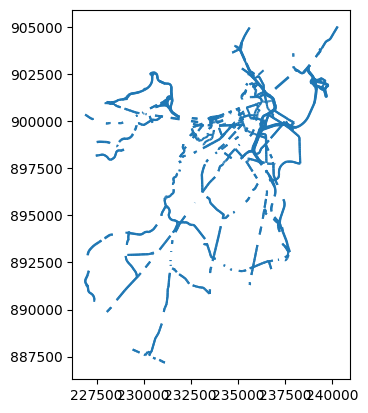

In [116]:
suitable_roads.overlay(secured_areas,keep_geom_type=False, how='difference').plot()

In [117]:
good_routes_forGas_dissolved=suitable_roads.overlay(secured_areas,keep_geom_type=False, how='difference').dissolve()
good_routes_forGas=gpd.GeoDataFrame(geometry=good_routes_forGas_dissolved.geometry)
good_routes_forGas

,geometry
0,"MULTILINESTRING ((233360.161 896561.149, 23336..."


<Axes: >

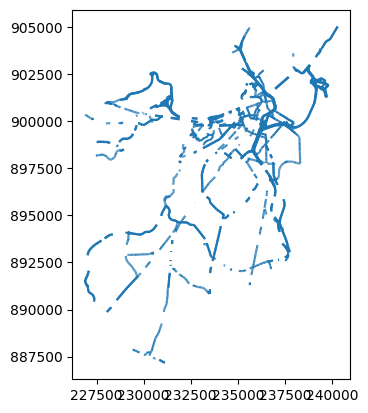

In [118]:
good_routes_forGas.plot()

We may choose a location from those places:

In [119]:
# newCOMPETITORS=safe_fuelCompetitors_gdf.copy()
potential_Locations=good_routes_forGas.copy()
newPOLYGONS=[]
pointsComputed=1
attempts=1
while pointsComputed<=len(gas_relocate):
  candidatePoint=potential_Locations.sample_points(1)
  candidateStation=gpd.GeoDataFrame(geometry=candidatePoint.buffer(100))
  if candidateStation.overlay(secured_areas,how='intersection',keep_geom_type=False).empty:
    newPOLYGONS.append(candidateStation)
    pointsComputed+=1
    potential_Locations=potential_Locations.overlay(candidateStation, how='difference', keep_geom_type=False)
  if attempts>len(gas_relocate)*10:
    break
  attempts+=1

# some info
attempts,len(newPOLYGONS)



(28, 16)

In [120]:
newPOLYGONS

[                                            geometry
 0  POLYGON ((228998.561 901162.797, 228998.079 90...,
                                             geometry
 0  POLYGON ((230439.457 887671.733, 230438.975 88...,
                                             geometry
 0  POLYGON ((228274.83 900956.024, 228274.348 900...,
                                             geometry
 0  POLYGON ((237342.403 894782.534, 237341.921 89...,
                                             geometry
 0  POLYGON ((235751.011 898382.281, 235750.53 898...,
                                             geometry
 0  POLYGON ((233680.875 900166.021, 233680.394 90...,
                                             geometry
 0  POLYGON ((236090.869 898851.142, 236090.388 89...,
                                             geometry
 0  POLYGON ((236141.856 899080.616, 236141.375 89...,
                                             geometry
 0  POLYGON ((228145.503 893841.669, 228145.022 89...,
                   

In [121]:
import pandas as pd
pd.concat(newPOLYGONS)

,geometry
0,"POLYGON ((228998.561 901162.797, 228998.079 90..."
0,"POLYGON ((230439.457 887671.733, 230438.975 88..."
0,"POLYGON ((228274.83 900956.024, 228274.348 900..."
0,"POLYGON ((237342.403 894782.534, 237341.921 89..."
0,"POLYGON ((235751.011 898382.281, 235750.53 898..."
0,"POLYGON ((233680.875 900166.021, 233680.394 90..."
0,"POLYGON ((236090.869 898851.142, 236090.388 89..."
0,"POLYGON ((236141.856 899080.616, 236141.375 89..."
0,"POLYGON ((228145.503 893841.669, 228145.022 89..."
0,"POLYGON ((230474.914 894168.889, 230474.432 89..."


In [122]:
GoodLocationsGas_buffered_gdf=pd.concat(newPOLYGONS)
GoodLocationsGas_gdf=gpd.GeoDataFrame(geometry=GoodLocationsGas_buffered_gdf.centroid)

<Axes: >

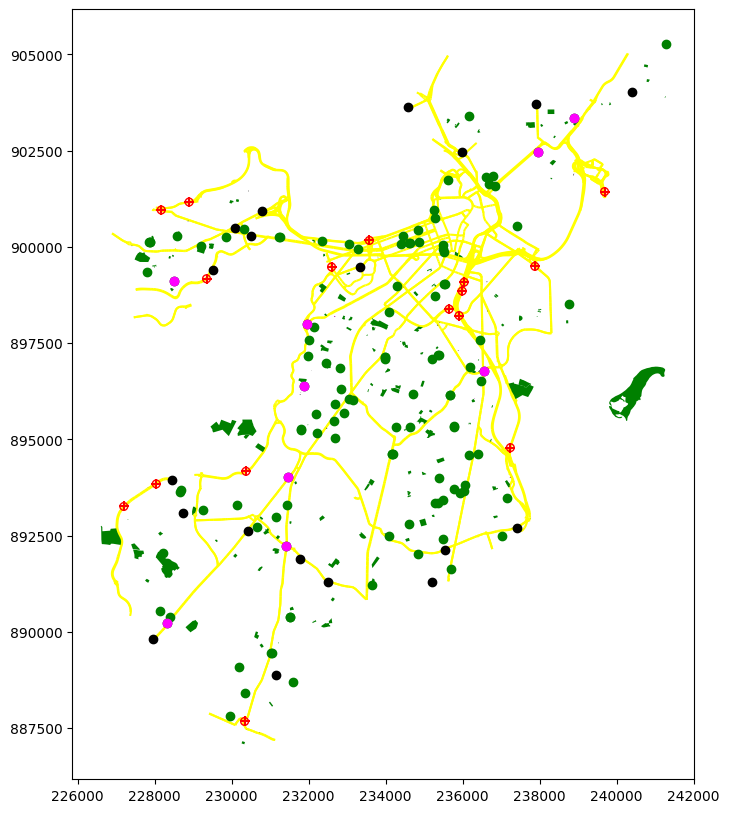

In [123]:
# original suitable roads
base = suitable_roads.plot(color='yellow', figsize=(10, 10),zorder=1)

# non-overlapping buffers
GoodLocationsGas_buffered_gdf.plot(ax=base, edgecolor='red', marker="+", facecolor='none',zorder=2)

# center points of the buffers
GoodLocationsGas_gdf.plot(ax=base, color='red', marker="+", markersize=50,zorder=3)

# all stations
fuelBoston.plot(ax=base,color='k',zorder=4)
schoolBoston.plot(ax=base,color='green',zorder=5)

# stations to relocate
fuelBoston.clip(gas_relocate).plot(ax=base,color='magenta',zorder=5)


## Reverse geocoding

Just get some addresses:

In [124]:
from geopy.geocoders import Nominatim
import time

# Initialize geocoder
geolocator = Nominatim(user_agent="boston_gas_stations")

def get_address(point):
  # Now coordinates are in degrees (lon, lat)
  lon = point.x
  lat = point.y
  location = geolocator.reverse((lat, lon), exactly_one=True, timeout=10)
  time.sleep(1)  # Rate limiting

  if location:
    return location.address
  else:
    return None # not found

In [125]:
# Get addresses
GoodLocationsGas_4326 = GoodLocationsGas_gdf.to_crs('EPSG:4326')
GoodLocationsGas_gdf['address'] = GoodLocationsGas_4326.geometry.apply(get_address)

In [126]:
GoodLocationsGas_gdf

,geometry,address
0,POINT (228898.561 901162.797),"Soldiers Field Road, North Brighton, Brighton,..."
0,POINT (230339.457 887671.733),"Hyde Park Avenue, Readville, Hyde Park, Boston..."
0,POINT (228174.83 900956.024),"North Beacon Street, Brighton, Boston, Suffolk..."
0,POINT (237242.403 894782.534),"William T. Morrissey Boulevard, Dorchester, Bo..."
0,POINT (235651.011 898382.281),"Suffolk County House of Correction, 20, Bradst..."
0,POINT (233580.875 900166.021),"Storrow Drive, Fenway, Boston, Suffolk County,..."
0,POINT (235990.869 898851.142),"City of Boston Tow Lot, Frontage Road Northbou..."
0,POINT (236041.856 899080.616),"John F. Fitzgerald Expressway, Seaport, South ..."
0,POINT (228045.503 893841.669),"650, Veterans of Foreign Wars Parkway, West Ro..."
0,POINT (230374.914 894168.889),"Centre Street, West Roxbury, Boston, Suffolk C..."


# Saving

Let's save these maps for R.

In [127]:
## Good practice to refresh your memory

## Find only GeoDataFrames in the current session
geodataframe_list = [var for var in globals() if isinstance(globals()[var], gpd.GeoDataFrame)]

print("List of GeoDataFrames in memory:")
for name in geodataframe_list:
    print(name)

List of GeoDataFrames in memory:
_
___
boston
_3
stations
_8
_10
fuelBoston
_16
schools
schoolBoston
_21
secured_schoolBoston
_33
fuelBoston_allPoly
_38
gas_relocate
_40
_41
streets
suitable_roads
secured_fuelBoston_allPoly
secured_areas_dissolved
secured_areas
good_routes_forGas_dissolved
good_routes_forGas
_54
potential_Locations
candidateStation
_58
GoodLocationsGas_buffered_gdf
GoodLocationsGas_gdf
GoodLocationsGas_4326
_63
_72
_77
_79
_85
_87
_96
_101
_103
_104
_117
_121
_126


These are the ones needed in R:

In [128]:
boston.to_file("dashboard.gpkg",driver='GPKG',layer='boston')
stations.to_file("dashboard.gpkg",driver='GPKG',layer='stations')
fuelBoston.to_file("dashboard.gpkg",driver='GPKG',layer='fuelBoston')
schoolBoston.to_file("dashboard.gpkg",driver='GPKG',layer='schoolBoston')
secured_schoolBoston.to_file("dashboard.gpkg",driver='GPKG',layer='secured_schoolBoston')
fuelBoston_allPoly.to_file("dashboard.gpkg",driver='GPKG',layer='fuelBoston_allPoly')
gas_relocate.to_file("dashboard.gpkg",driver='GPKG',layer='gas_relocate')
suitable_roads.to_file("dashboard.gpkg",driver='GPKG',layer='suitable_roads')
streets.to_file("dashboard.gpkg",driver='GPKG',layer='streets')
secured_fuelBoston_allPoly.to_file("dashboard.gpkg",driver='GPKG',layer='secured_fuelBoston_allPoly')
good_routes_forGas.to_file("dashboard.gpkg",driver='GPKG',layer='good_routes_forGas')
GoodLocationsGas_buffered_gdf.to_file("dashboard.gpkg",driver='GPKG',layer='GoodLocationsGas_buffered_gdf')
GoodLocationsGas_gdf.to_file("dashboard.gpkg",driver='GPKG',layer='GoodLocationsGas_gdf')
GoodLocationsGas_4326.to_file("dashboard.gpkg",driver='GPKG',layer='GoodLocationsGas_4326')

Take a look at the [Dashboard](https://spatial-data-analytics-dacss-690d.github.io/Gas-Station-Relocation-Analysis/) & [GitHub](https://github.com/Spatial-Data-Analytics-DACSS-690D/Gas-Station-Relocation-Analysis)
